In [3]:
# to operate on these arrays
import numpy as np

#It provides data structures like DataFrames and
# Series that allow for easy data handling and analysis
import pandas as pd

# This is part of the scikit-learn library and is used to perform K-means clustering, an unsupervised machine
# learning algorithm that groups similar data points into clusters.
from sklearn.cluster import KMeans

#The "pyplot" submodule provides functions to create various
# types of plots and visualizations
import matplotlib.pyplot as plt

# Another part of scikit-learn, PCA (Principal Component Analysis) is used for dimensionality reduction. It helps
# transform high-dimensional data into a lower-dimensional representation while preserving as much of the variance as possible.
from sklearn.decomposition import PCA

pd.set_option("display.max_columns", None)    # Sets the maximum number of columns to be displayed in a Pandas DataFrame to be unlimited
pd.set_option("display.max_rows", None)       # Sets the maximum number of rows to be displayed in a Pandas DataFrame to be unlimited
pd.set_option("display.width", None)          # Sets the maximum width of the display for a Pandas DataFrame to be unlimited
pd.set_option("display.max_colwidth", None)   # Sets the maximum width of column contents to be unlimited, allowing for complete display of text data

print("You have imported all the libraries.")

You have imported all the libraries.


In [5]:
df = pd.read_csv('/Users/andreathomas/Desktop/Tableau dashboard/spotify.csv')

df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (Official Music Video),Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser),Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


In [7]:
# Display the shape before dropping NaN values
print("Shape before dropping NaN values:", df.shape)

# Drop NaN values from the DataFrame
df.dropna(inplace=True)

# Display the shape after dropping NaN values
print("Shape after dropping NaN values:", df.shape)
df.head()

Shape before dropping NaN values: (20594, 24)
Shape after dropping NaN values: (20592, 24)


,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (Official Music Video),Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser),Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


In [13]:
# TODO: List the columns that you want to drop
columns_to_drop = ['Artist', 'Album', 'Album_type','Title','Licensed','official_video','most_playedon']

# Create a new DataFrame that excludes the specified columns
dropped_df = df.drop(columns=columns_to_drop)

# Let's check if our specified columns are no longer there!
dropped_df.head()

,Track,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Channel,Views,Likes,Comments,Stream,EnergyLiveness
0,Feel Good Inc.,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz,693555221.0,6220896.0,169907.0,1.040235e+09,1.150082
1,Rhinestone Eyes,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz,72011645.0,1079128.0,31003.0,3.100837e+08,15.183585
2,New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz,8435055.0,282142.0,7399.0,6.306347e+07,7.956897
3,On Melancholy Hill,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz,211754952.0,1788577.0,55229.0,4.346636e+08,11.546875
4,Clint Eastwood,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz,618480958.0,6197318.0,155930.0,6.172597e+08,9.942693


In [15]:
dropped_df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,2.059200e+04,2.059200e+04,2.059200e+04,2.059200e+04,20592.000000
mean,0.620162,0.635238,-7.678999,0.096742,0.291419,0.056167,0.193672,0.530128,120.574326,3.742802,9.204529e+07,6.480451e+05,2.684902e+04,1.326451e+08,5.167227
std,0.165399,0.214193,4.639089,0.112183,0.286117,0.193630,0.168829,0.245499,29.565662,2.084986,2.726146e+08,1.773725e+06,1.911843e+05,2.423699e+08,4.117431
min,0.000000,0.000020,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,0.516417,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000049
25%,0.519000,0.507000,-8.868250,0.035700,0.045200,0.000000,0.094100,0.340000,96.994750,2.997546,1.478416e+06,1.754600e+04,4.060000e+02,1.558757e+07,2.386190
50%,0.638000,0.666000,-6.541000,0.050700,0.193000,0.000002,0.125000,0.538000,119.959500,3.551433,1.331348e+07,1.153155e+05,3.006000e+03,4.730244e+07,4.256881
75%,0.741000,0.798000,-4.935000,0.104000,0.477000,0.000474,0.237000,0.727000,139.924500,4.202329,6.740061e+07,5.000950e+05,1.373900e+04,1.343384e+08,6.822034
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,77.934300,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,59.113924


In [17]:
# TODO: Identify the numerical feature columns you want to normalize
numerical_columns = ['Loudness','Tempo','Duration_min','Views', 'Likes','Comments','Stream','EnergyLiveness']

# Create a copy of the dropped_df
final_df = dropped_df

# Apply min-max scaling to the selected numerical feature columns
final_df[numerical_columns] = (dropped_df[numerical_columns] - dropped_df[numerical_columns].min()) / (dropped_df[numerical_columns].max() - dropped_df[numerical_columns].min())

# Let's see what our normalization did!
final_df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000,20592.000000
mean,0.620162,0.635238,0.817706,0.096742,0.291419,0.056167,0.193672,0.530128,0.495432,0.041675,0.011392,0.012760,0.001669,0.039169,0.087411
std,0.165399,0.214193,0.098346,0.112183,0.286117,0.193630,0.168829,0.245499,0.121483,0.026932,0.033741,0.034924,0.011887,0.071569,0.069653
min,0.000000,0.000020,0.000000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.519000,0.507000,0.792494,0.035700,0.045200,0.000000,0.094100,0.340000,0.398545,0.032049,0.000183,0.000345,0.000025,0.004603,0.040365
50%,0.638000,0.666000,0.841831,0.050700,0.193000,0.000002,0.125000,0.538000,0.492906,0.039203,0.001648,0.002270,0.000187,0.013968,0.072011
75%,0.741000,0.798000,0.875877,0.104000,0.477000,0.000474,0.237000,0.727000,0.574941,0.047611,0.008342,0.009847,0.000854,0.039669,0.115404
max,0.975000,1.000000,1.000000,0.964000,0.996000,1.000000,1.000000,0.993000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
def optimise_k_means(data, max_k):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=['number'])

    means = []
    inertias = []

    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, n_init=max_k)
        kmeans.fit(numeric_data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    # Generate the elbow plot
    plt.figure(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

print("This code block has been run and the optimise_k_means() function is now available for use.")

This code block has been run and the optimise_k_means() function is now available for use.


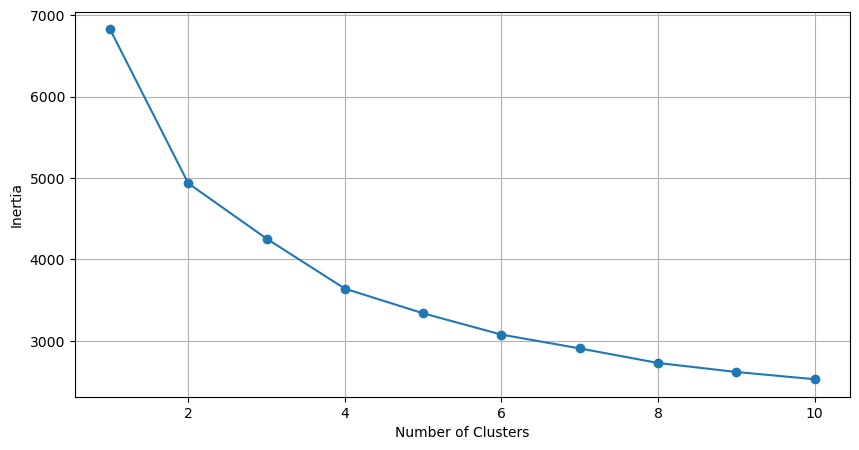

In [25]:
optimise_k_means(final_df, 10)

In [31]:
# Select only numeric columns from final_df
numeric_df = final_df.select_dtypes(include=['number'])

# Initialize a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, n_init='auto')

# Fit the KMeans model to the numeric data
kmeans.fit(numeric_df)

# Assign cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_
final_df['Cluster'] = kmeans.labels_

df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon,Cluster
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,3.710667,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify,0
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,3.336217,Gorillaz - Rhinestone Eyes [Storyboard Film] (Official Music Video),Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify,0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3.585833,Gorillaz - New Gold ft. Tame Impala & Bootie Brown (Official Visualiser),Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify,1
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,3.897783,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify,1
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,5.682000,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube,1


In [37]:
from sklearn.preprocessing import StandardScaler

def preprocess_for_clustering(df, drop_columns=None, scale=True):
    """
    Prepares a DataFrame for clustering by removing non-numeric columns
    and optionally scaling the features.

    Args:
        df (pd.DataFrame): The original DataFrame.
        drop_columns (list): List of columns to exclude from clustering (e.g. IDs, titles).
        scale (bool): Whether to scale numeric features.

    Returns:
        numeric_df (pd.DataFrame): Preprocessed DataFrame with only numeric (and scaled) features.
    """
    # Drop specified columns (e.g., metadata)
    if drop_columns:
        df = df.drop(columns=drop_columns, errors='ignore')

    # Keep only numeric columns
    numeric_df = df.select_dtypes(include=['number'])

    # Optionally scale the data
    if scale:
        scaler = StandardScaler()
        numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

    return numeric_df

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


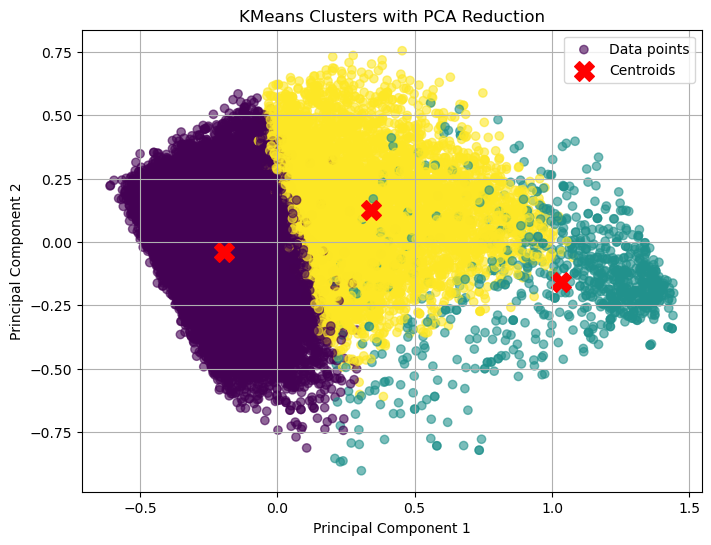

In [55]:
# Extract only the columns used for clustering
numeric_data = final_df[numerical_columns]

# Fit KMeans on the correct data
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(numeric_data)

# Assign cluster labels
final_df['Cluster'] = kmeans.labels_

# Fit PCA on the same numeric data
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(numeric_data)

# Add PCA results to the DataFrame
final_df['pca_1'] = reduced_features[:, 0]
final_df['pca_2'] = reduced_features[:, 1]

# Transform the KMeans centroids to PCA space
centroid_pca = pca.transform(kmeans.cluster_centers_)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(final_df['pca_1'], final_df['pca_2'], c=final_df['Cluster'], cmap='viridis', alpha=0.6, label='Data points')
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clusters with PCA Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# This function attemps to find the index of a given track name in the 'Track' column of the dataframe
def find_track_index(track_name, df):
    try:
        # Attempt to find the index of the first occurence of 'track_name' in the 'Track' column of 'df'
        track_index = df[df['Track'] == track_name].index[0]
        # Return the index if found
        return track_index
    except IndexError:
        # If the track name is not found, return None
        return None

In [65]:
def find_artist_recommendation_representative(artist_name, df):
    # Filter for all songs by the artist (case-insensitive)
    artist_songs = df[df['Artist'].str.lower() == artist_name.lower()]

    if artist_songs.empty:
        print(f"Artist '{artist_name}' not found in the dataset.")
        return

    # Find the most common cluster for the artist
    representative_cluster = artist_songs['Cluster'].mode()[0]

    # Filter songs in that cluster, excluding the artist's own songs
    filtered_df = df[
        (df['Cluster'] == representative_cluster) &
        (df['Artist'].str.lower() != artist_name.lower())
    ]

    if filtered_df.empty:
        print(f"No recommendations found in the same cluster for artist '{artist_name}'.")
        return

    # Sample up to 5 recommendations
    recommendations = filtered_df.sample(n=min(5, len(filtered_df)))

    print(f"\nRecommendations based on the style of '{artist_name}' (Cluster {representative_cluster}):")
    for _, row in recommendations.iterrows():
        print(f"- {row['Track']} by {row['Artist']}")


In [89]:
find_artist_recommendation_representative('Black Eyed Peas', df)



Recommendations based on the style of 'Black Eyed Peas' (Cluster 0):
- 3005 by Childish Gambino
- Better in the Dark by TV Girl
- State Of The Art by Gotye
- Not Tonight (feat. Da Brat, Left Eye, Missy "Misdemeanor" Elliott and Angie Martinez) - Remix by Lil' Kim
- Donne-moi l’accord by Dadju


In [81]:
def find_random_song(track_name, df):
    # Call the 'find_track_index' function to get the index of the provided 'track_name'
    track_index = find_track_index(track_name, df)

    # Retrieve the cluster label of the provided track using its index
    cluster = df.loc[track_index]['Cluster']

    # Create a filter to select rows in 'df' that don't belong to the same cluster as the provided track
    filter = (df['Cluster'] != cluster)

    # Apply the filter to 'df' to get a DataFrame containing songs from different clusters
    filtered_df = df[filter]

    # Generate song recommendations by randomly selecting tracks from the filtered dataframe
    for i in range(5):
        # Randomly sample a track from the shuffled DataFrame
        random_song = filtered_df.sample()
        # Print the random song track's title and artist
        print(random_song.iloc[0]['Track'] + ' by ' + random_song.iloc[0]['Artist'])

In [91]:
find_artist_recommendation_representative('Black Eyed Peas', df)


Recommendations based on the style of 'Black Eyed Peas' (Cluster 0):
- Wait For You by Youjeen
- Baila Para Mi by La Mosca Tse-Tse
- Maari Thara Local (From "Maari") - Here Comes Maari by Vijay Yesudas
- Nem Vá by Zé Neto & Cristiano
- Learnalilgivinanlovin by Gotye


In [95]:
# TODO: Insert the accuracies for each of the functions
recommendations_accuracy = [0.7,0.6,0.9]
random_songs_accuracy = [0.5,0.7,0.7]

recommendations_average = sum(recommendations_accuracy) / len(recommendations_accuracy)
random_songs_average = sum(random_songs_accuracy) / len(random_songs_accuracy)

print("Recommendations average accuracy:", recommendations_average)
print("Random songs average accuracy:", random_songs_average)

Recommendations average accuracy: 0.7333333333333334
Random songs average accuracy: 0.6333333333333333
